# Figure 1  A multi-sector single cell atlas of HCC

#  

In [2]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

adata = sc.read("./data/Liver10X_73k.h5ad")

/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/anaconda3/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.15.4 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
sc.settings.set_figure_params(dpi=100)

In [4]:
adata

AnnData object with n_obs × n_vars = 73589 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

#   

# Plotting  

### Louvain Clusters

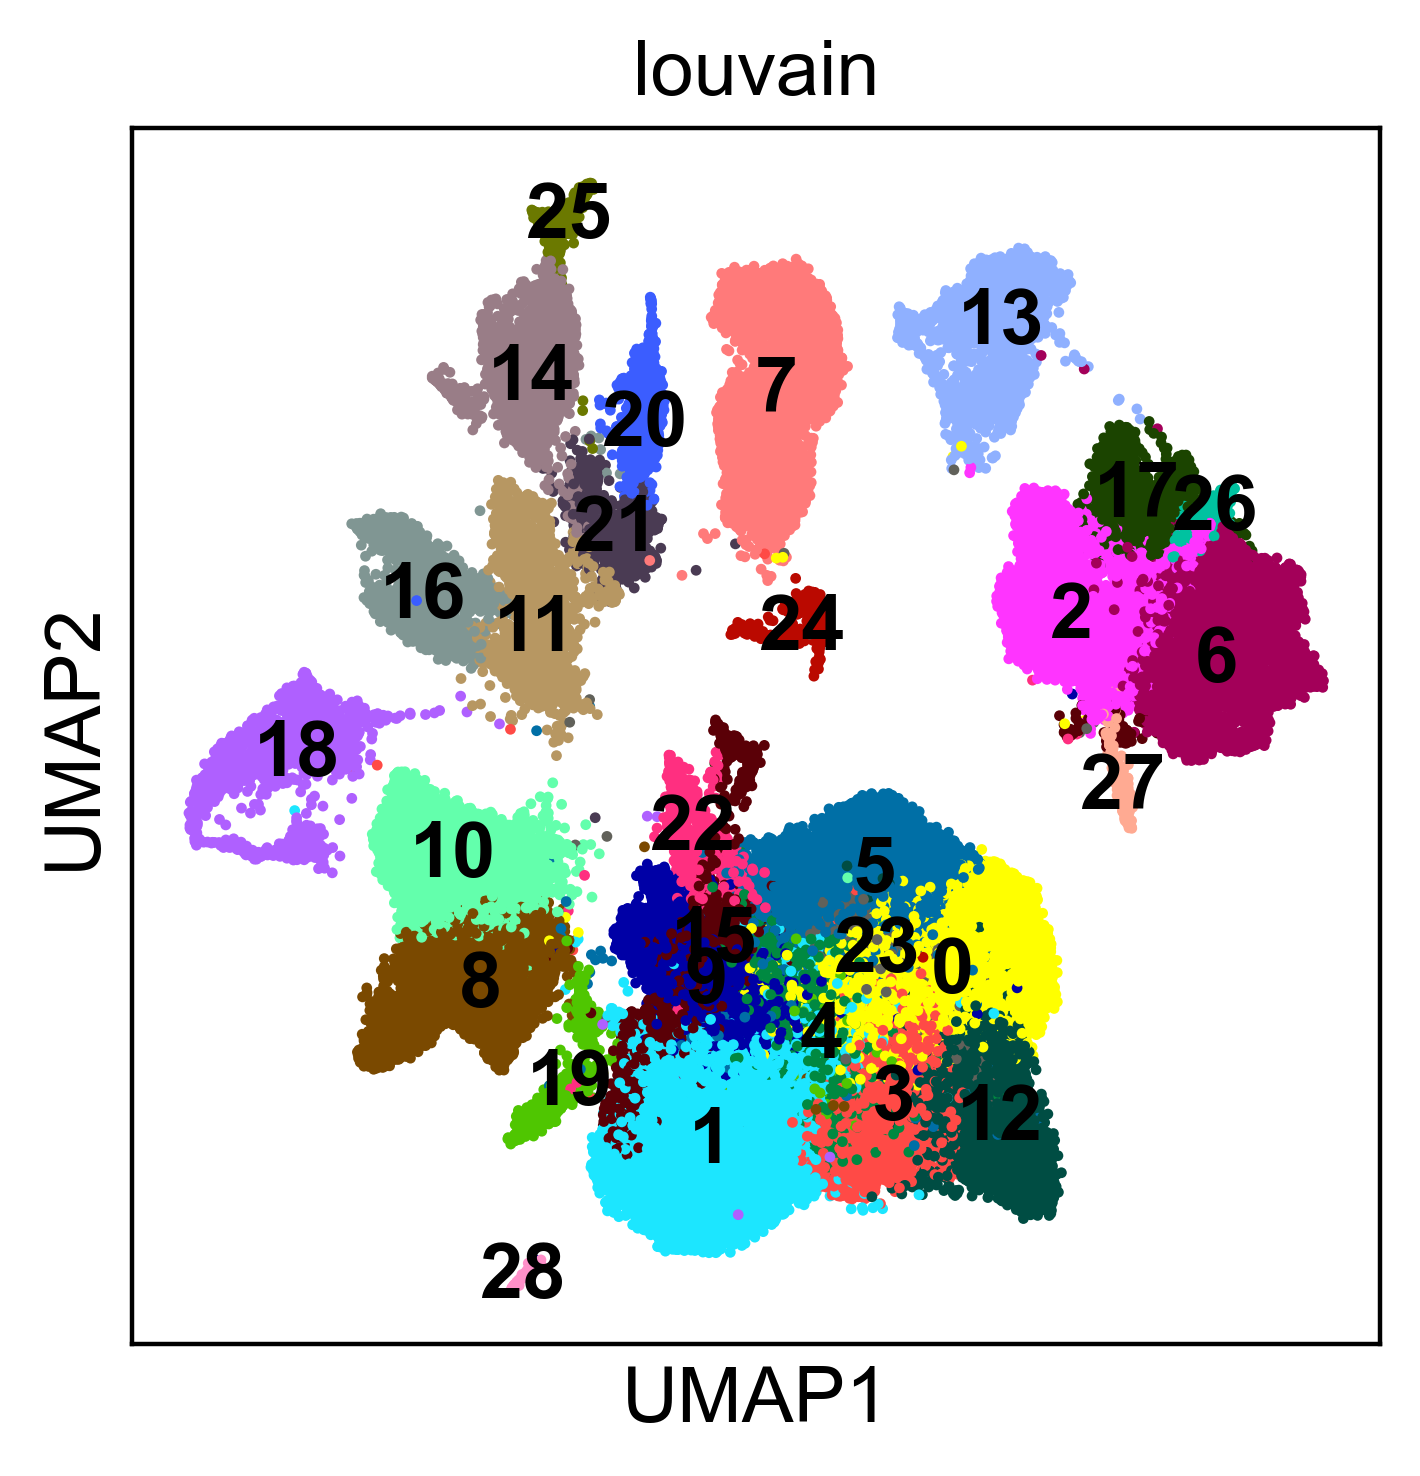

In [17]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color='louvain', legend_loc= 'on data',
           palette=['#FFFF00','#1CE6FF','#FF34FF','#FF4A46','#008941',
                    '#006FA6','#A30059','#ff7a7a','#7A4900','#0000A6',
                    '#63FFAC','#B79762','#004D43','#8FB0FF','#997D87',
                    '#5A0007','#809693','#1B4400','#af60ff','#4FC601',
                    '#3B5DFF','#4A3B53','#FF2F80','#61615A','#BA0900',
                    '#6B7900','#00C2A0','#FFAA92','#FF90C9'], size=15)

###  Patient ID

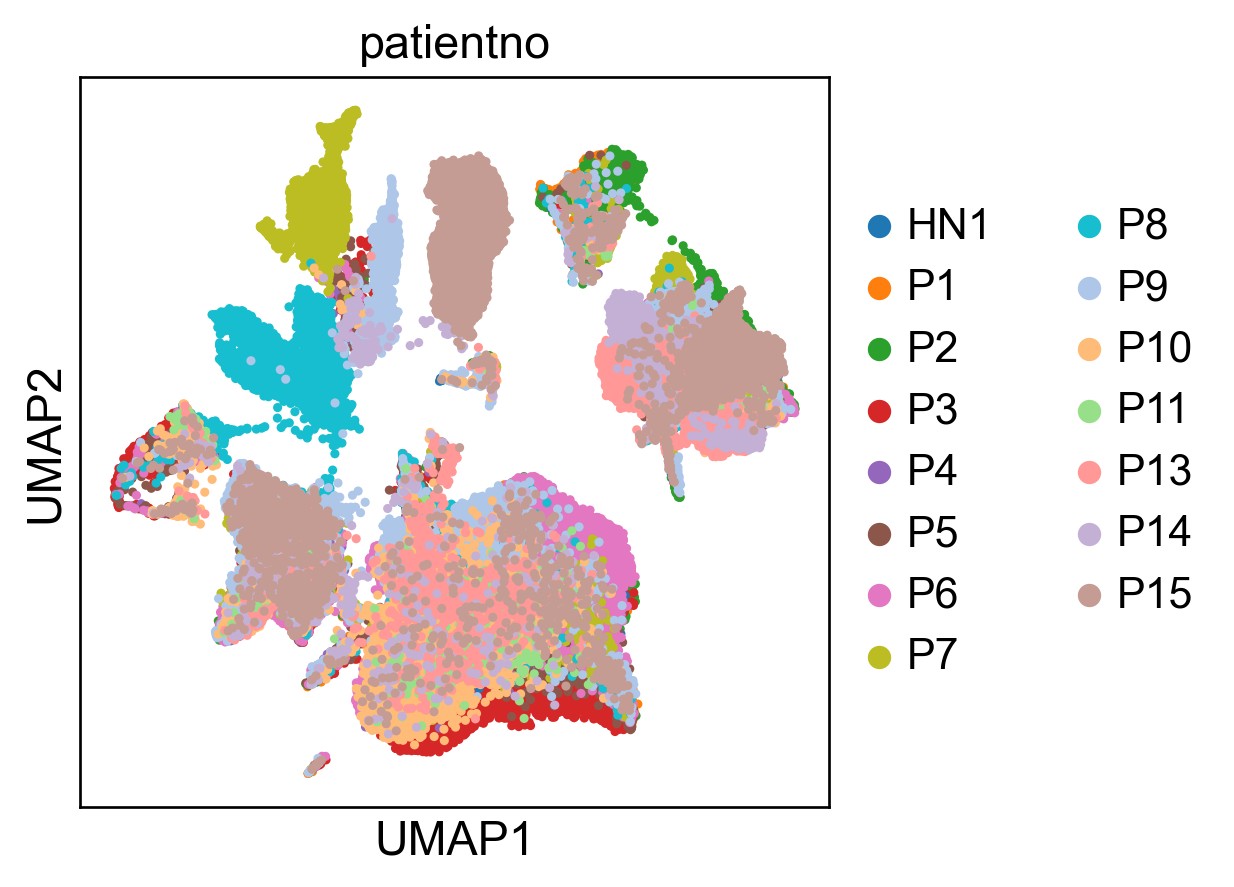

In [11]:
sc.settings.set_figure_params(dpi=120)
sc.pl.umap(adata, color=['patientno'], size=30)

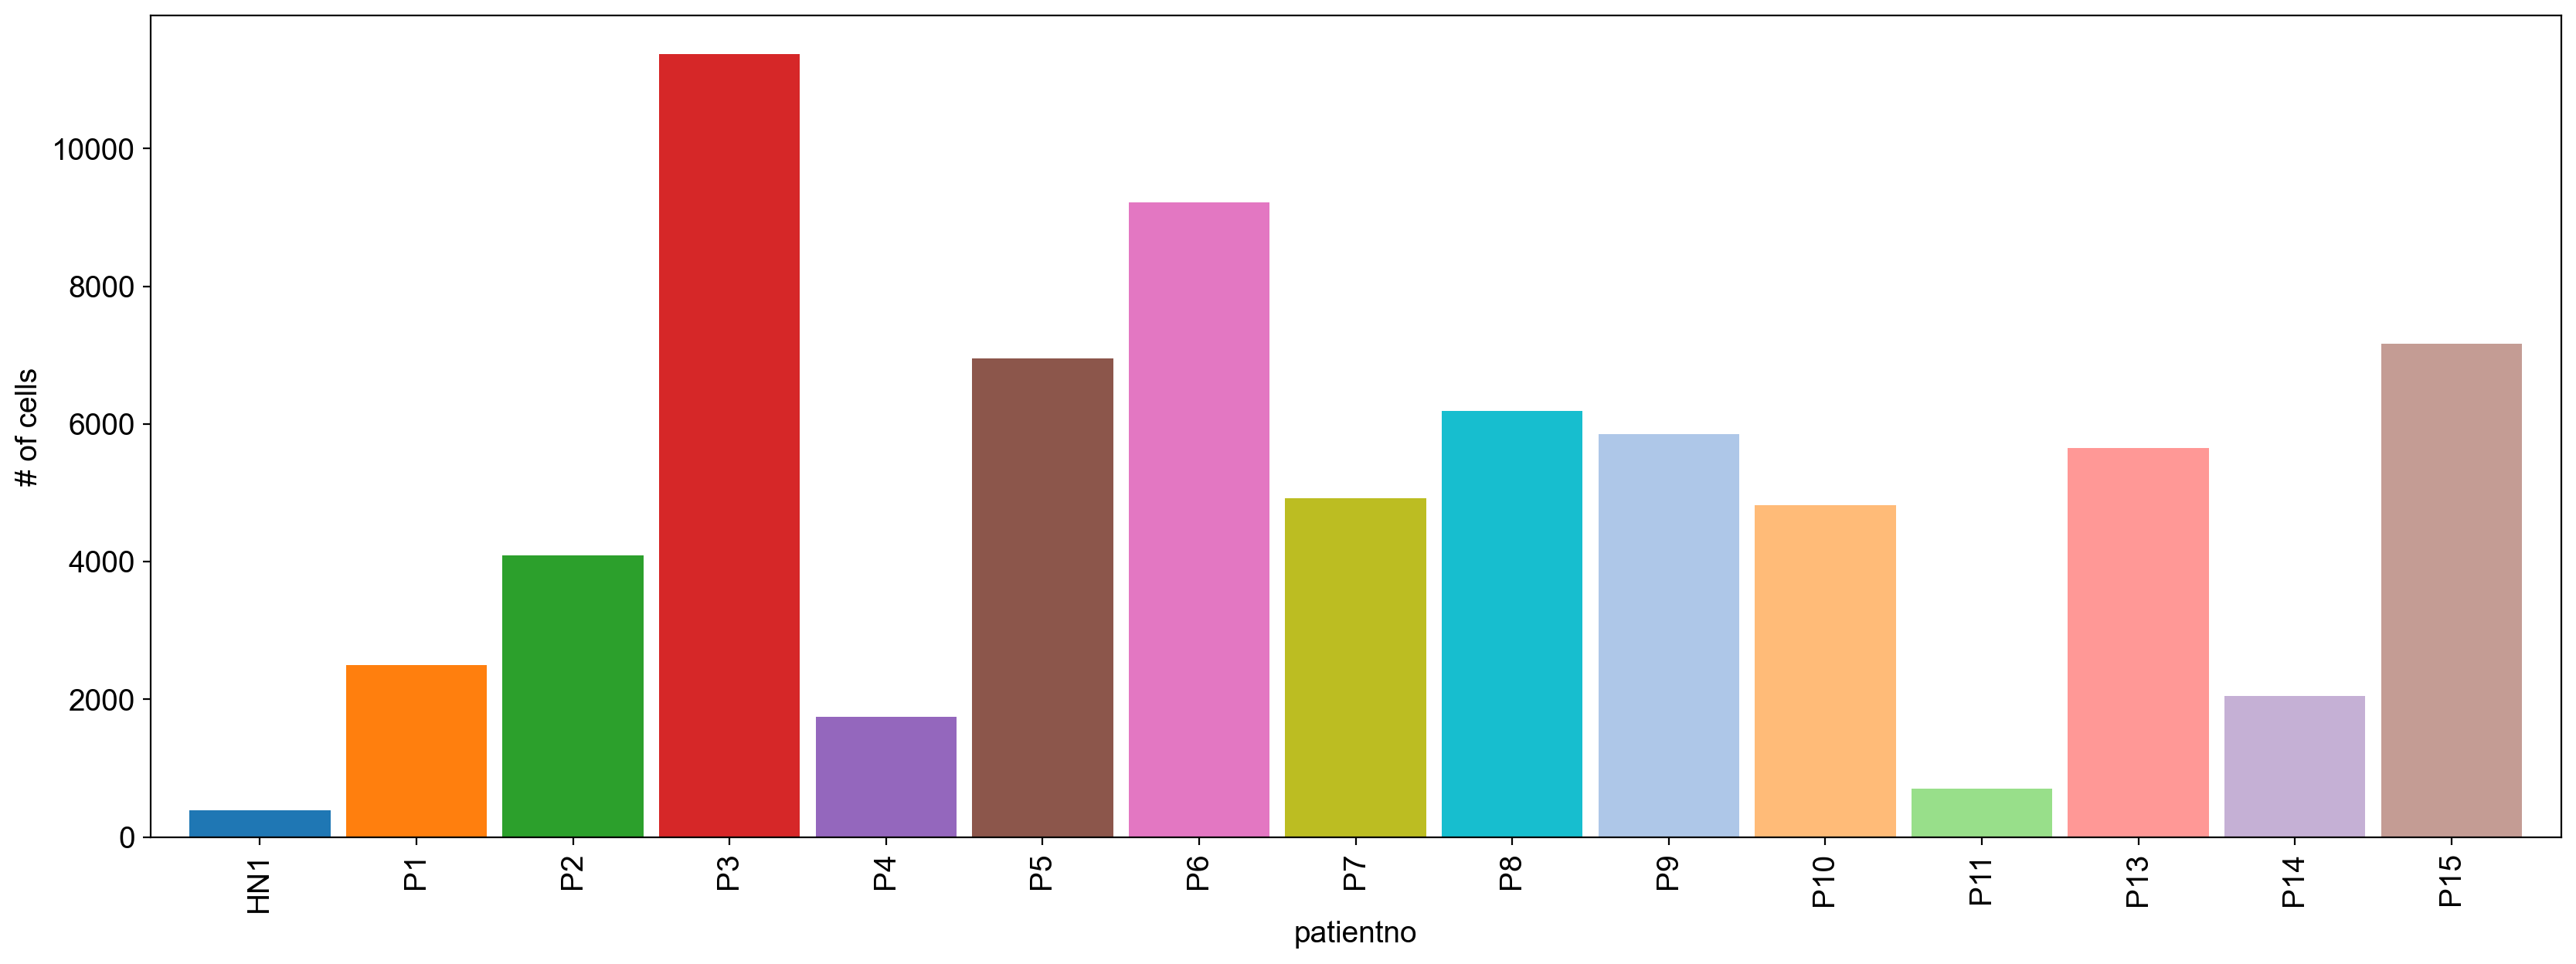

In [19]:
df = adata.obs.groupby(['patientno']).size()

ax = df.plot(kind='bar', figsize=[20,7] , width=0.9, color=adata.uns['patientno_colors'])
plt.ylabel("# of cells")
plt.xlabel("patientno")
plt.grid(False)
#plt.savefig('./figures_Liv73k/patient_no.cells.pdf')

#  

### PNC (Peripheral Tumor, Adjacent Normal, Core Tumor)

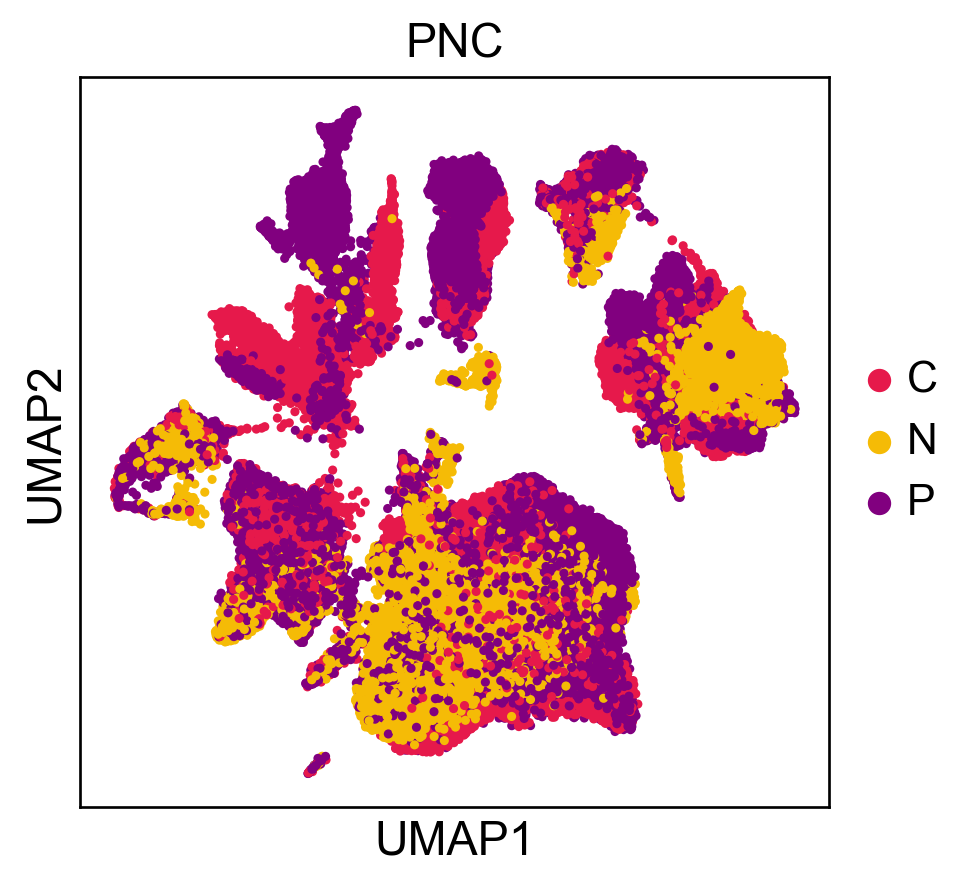

In [10]:
sc.settings.set_figure_params(dpi=120)
sc.pl.umap(adata, color=['PNC'], size=30, palette=['#e6194b', '#f5bb06', '#81007f'])

### Myeloid Circle plot 

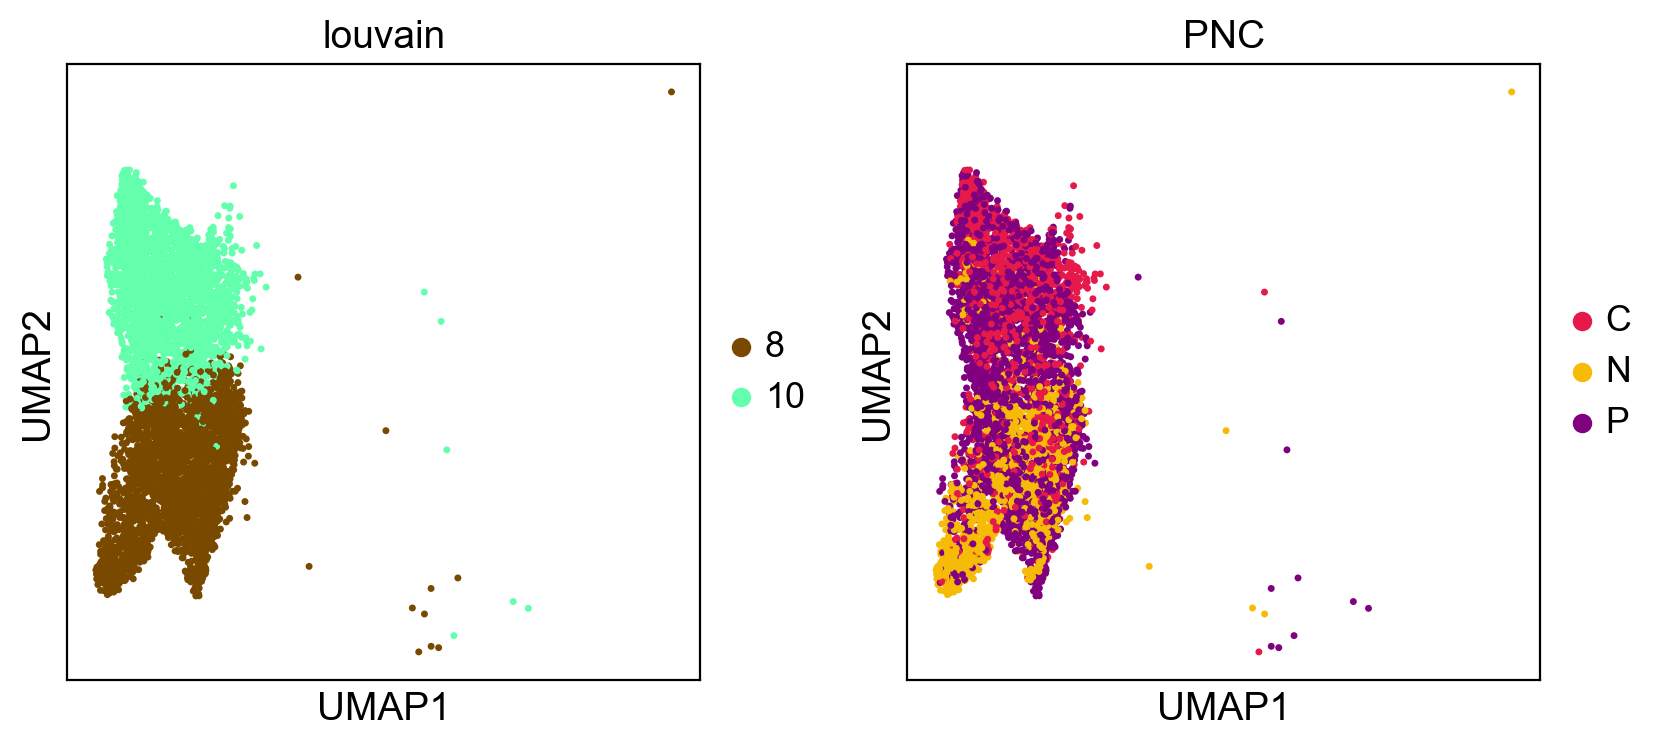

View of AnnData object with n_obs × n_vars = 5616 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

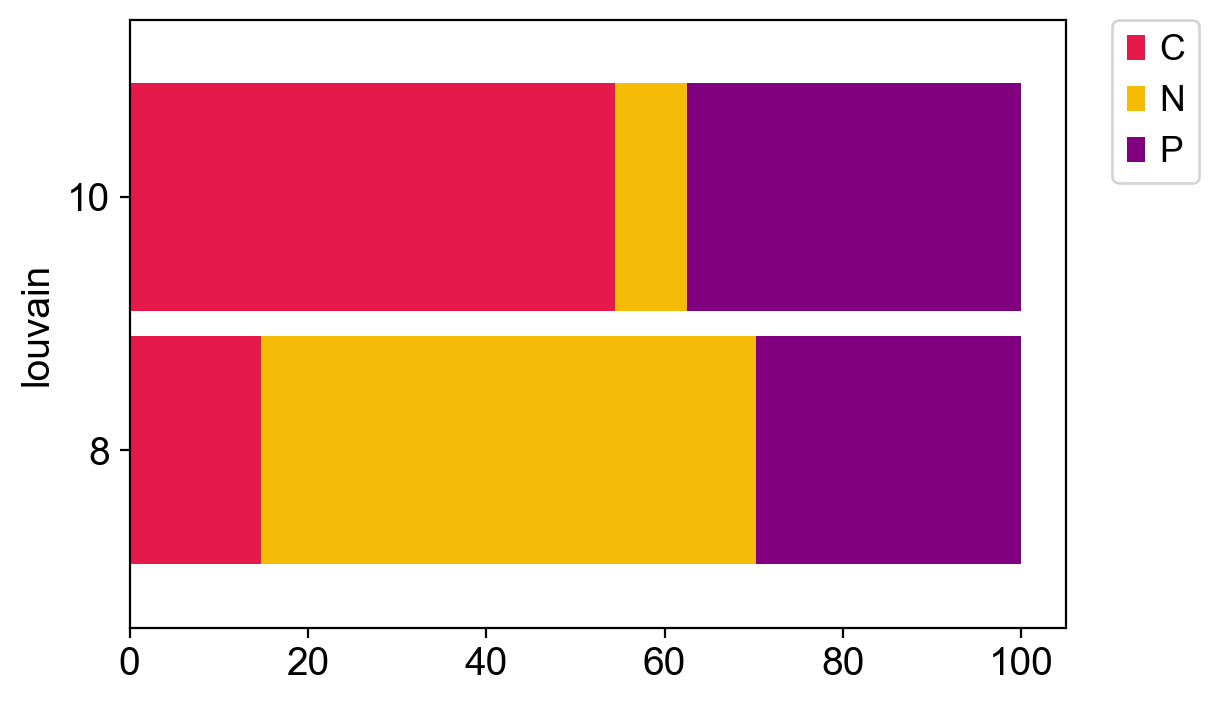

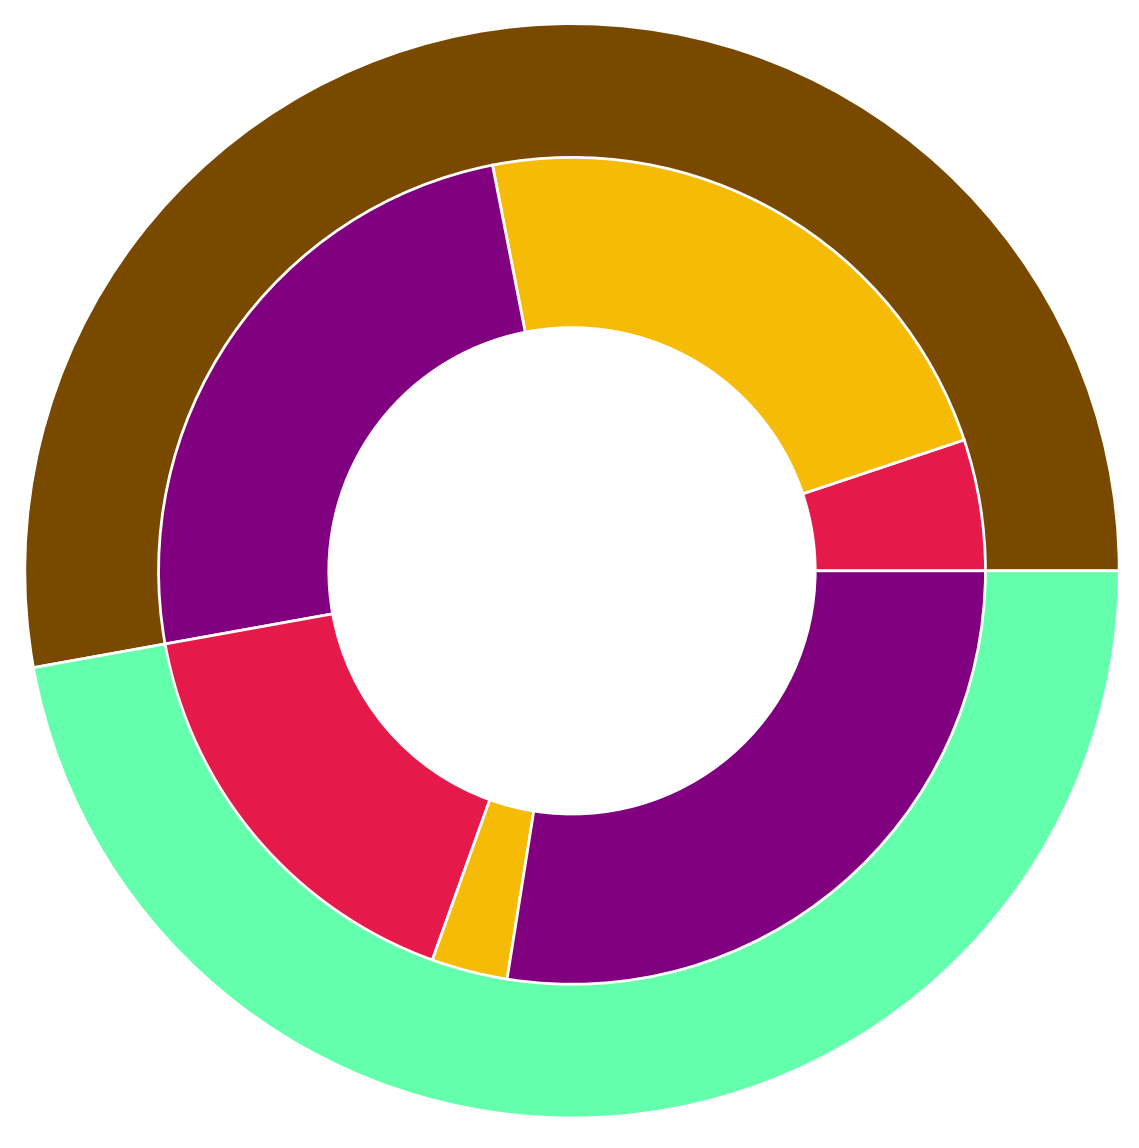

In [23]:
adata_mye = adata[adata.obs.loc[adata.obs.louvain.isin(['8','10'])].index.tolist(), ]

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata_mye, color=['louvain','PNC'], size = 25)#, save='_louvain.png')
display(adata_mye)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = adata_mye.obs.groupby('PNC').size()

df = adata_mye.obs.groupby(['PNC','louvain']).size().unstack().fillna(0)
df = df.div(count, axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=['#e6194b', '#f5bb06', '#81007f'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_NT.pdf')

NT = adata_mye.obs.groupby(['louvain','PNC']).size()
NT

fig, ax = plt.subplots()

size = 0.7
vals = np.array(NT.unstack())

outer_colors = adata_mye.uns['louvain_colors']
inner_colors = ['#e6194b', '#f5bb06', '#81007f']

ax.pie(vals.sum(axis=1), radius=2.5-0.25, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=2.3-0.6, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()
#fig.savefig('piechart__HCC_mye_PNC.pdf', bbox_inches='tight')
plt.close(fig) 

### Lymphoid Circle plot 

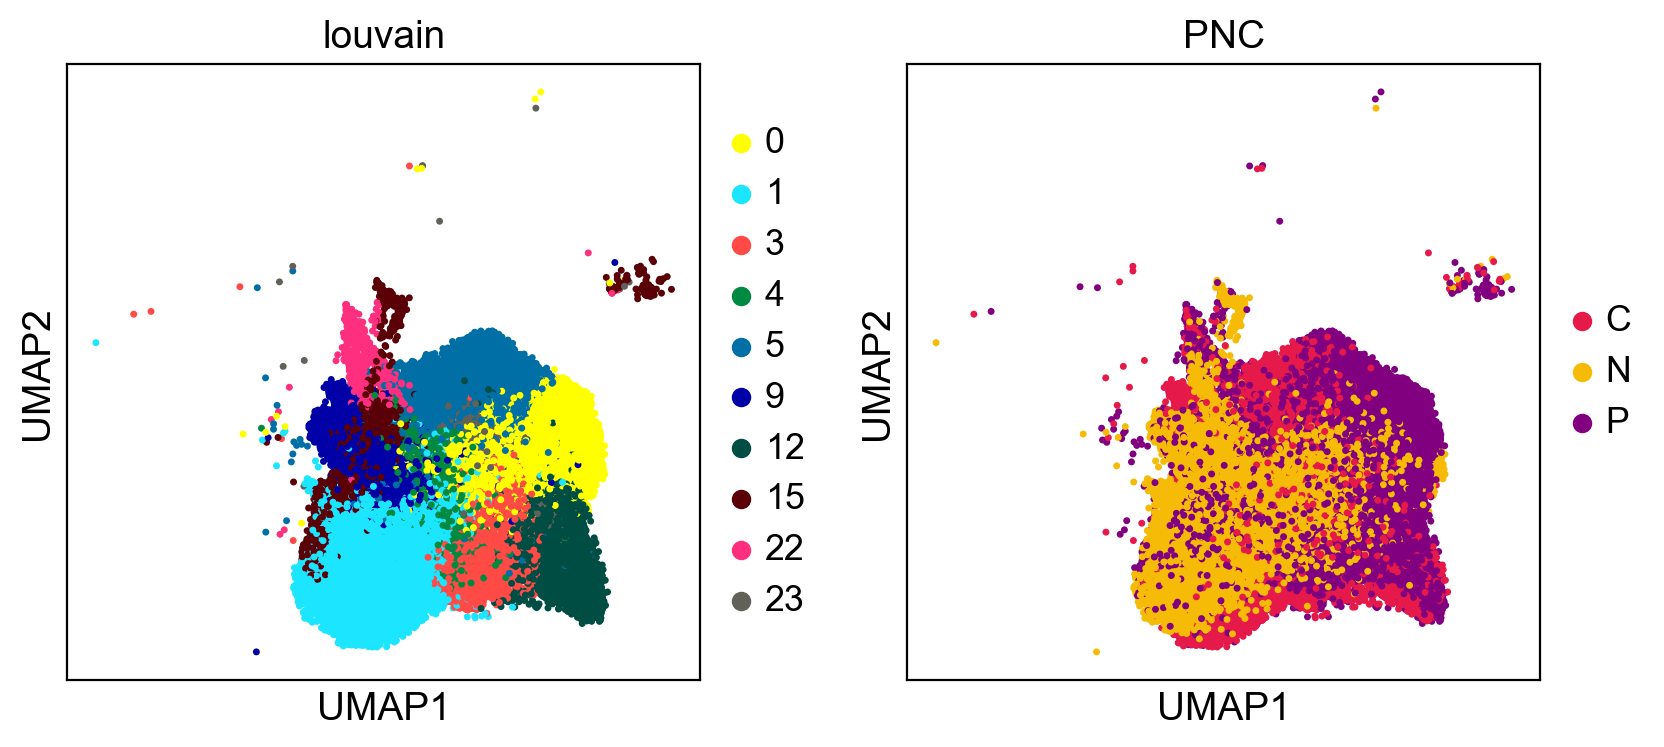

View of AnnData object with n_obs × n_vars = 39288 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

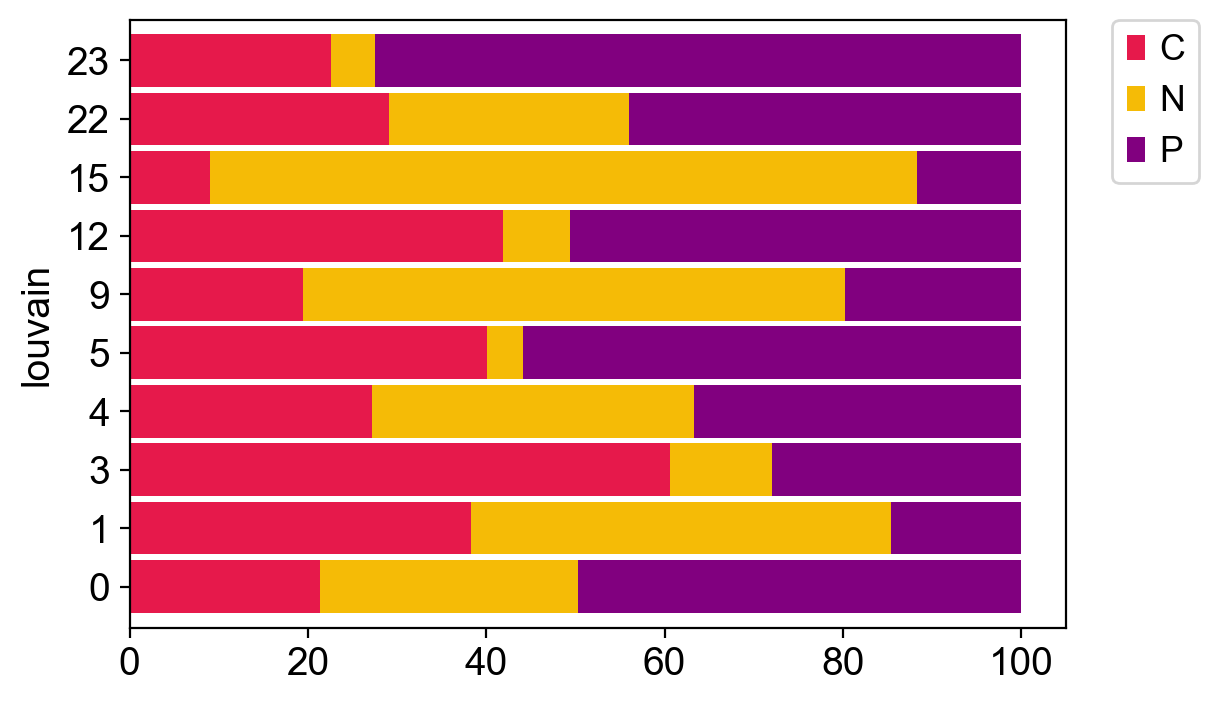

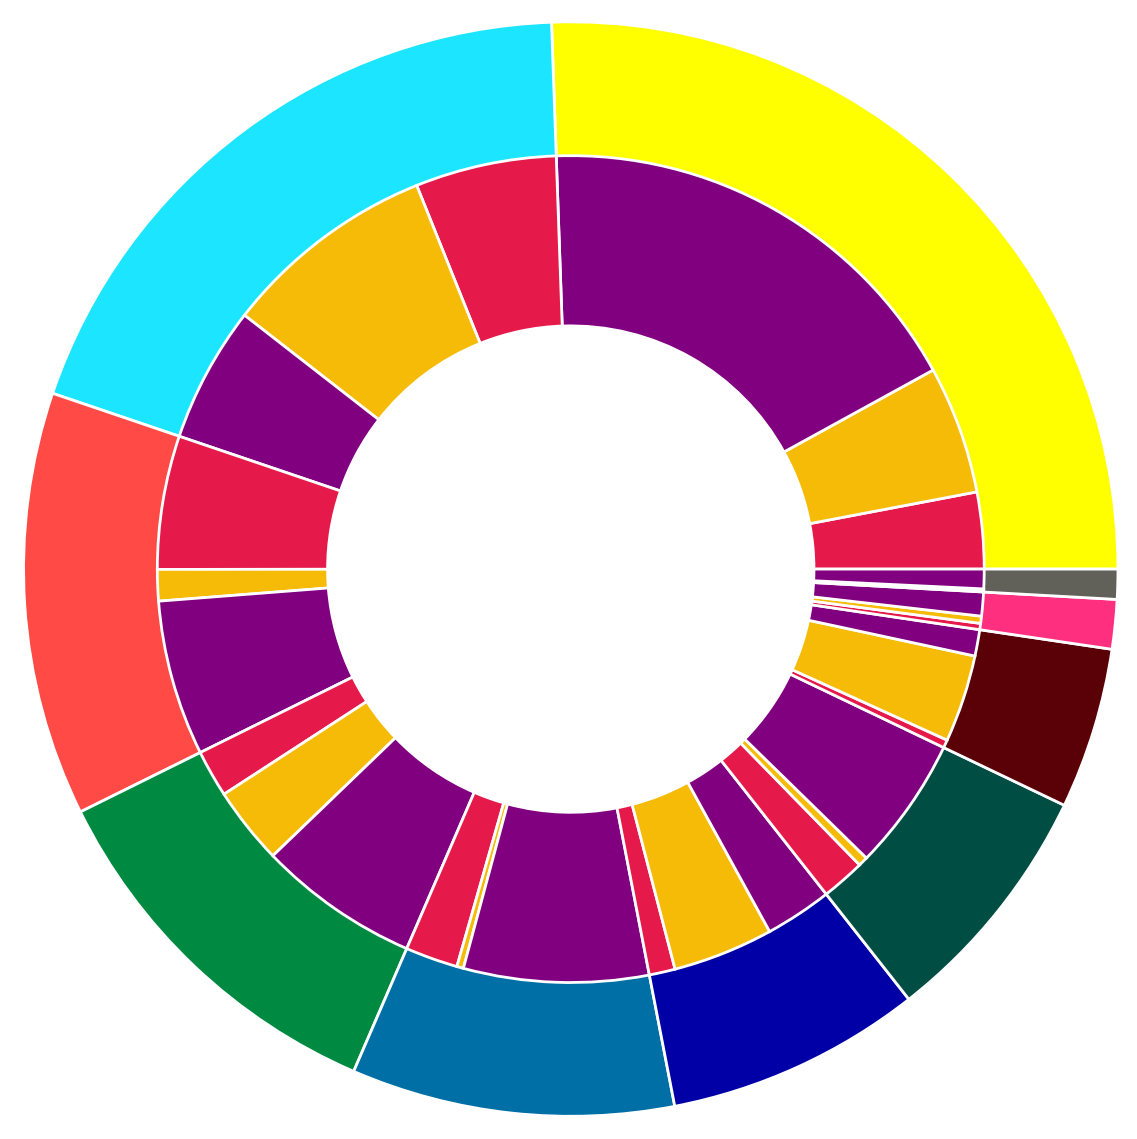

In [24]:
adata_lymph = adata[adata.obs.loc[adata.obs.louvain.isin(['0','1','3','4','5','9',
                                                          '12','15','22','23'])].index.tolist(), ]

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata_lymph, color=['louvain','PNC'], size = 25)#, save='_louvain.png')
display(adata_lymph)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = adata_lymph.obs.groupby('PNC').size()

df = adata_lymph.obs.groupby(['PNC','louvain']).size().unstack().fillna(0)
df = df.div(count, axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=['#e6194b', '#f5bb06', '#81007f'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_NT.pdf')

NT = adata_lymph.obs.groupby(['louvain','PNC']).size()
NT

fig, ax = plt.subplots()

size = 0.7
vals = np.array(NT.unstack())

outer_colors = adata_lymph.uns['louvain_colors']
inner_colors = ['#e6194b', '#f5bb06', '#81007f']

ax.pie(vals.sum(axis=1), radius=2.5-0.25, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=2.3-0.6, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()
#fig.savefig('piechart__HCC_imm_PNC.pdf', bbox_inches='tight')
#plt.close(fig) 

### Endothelial Circle plot 

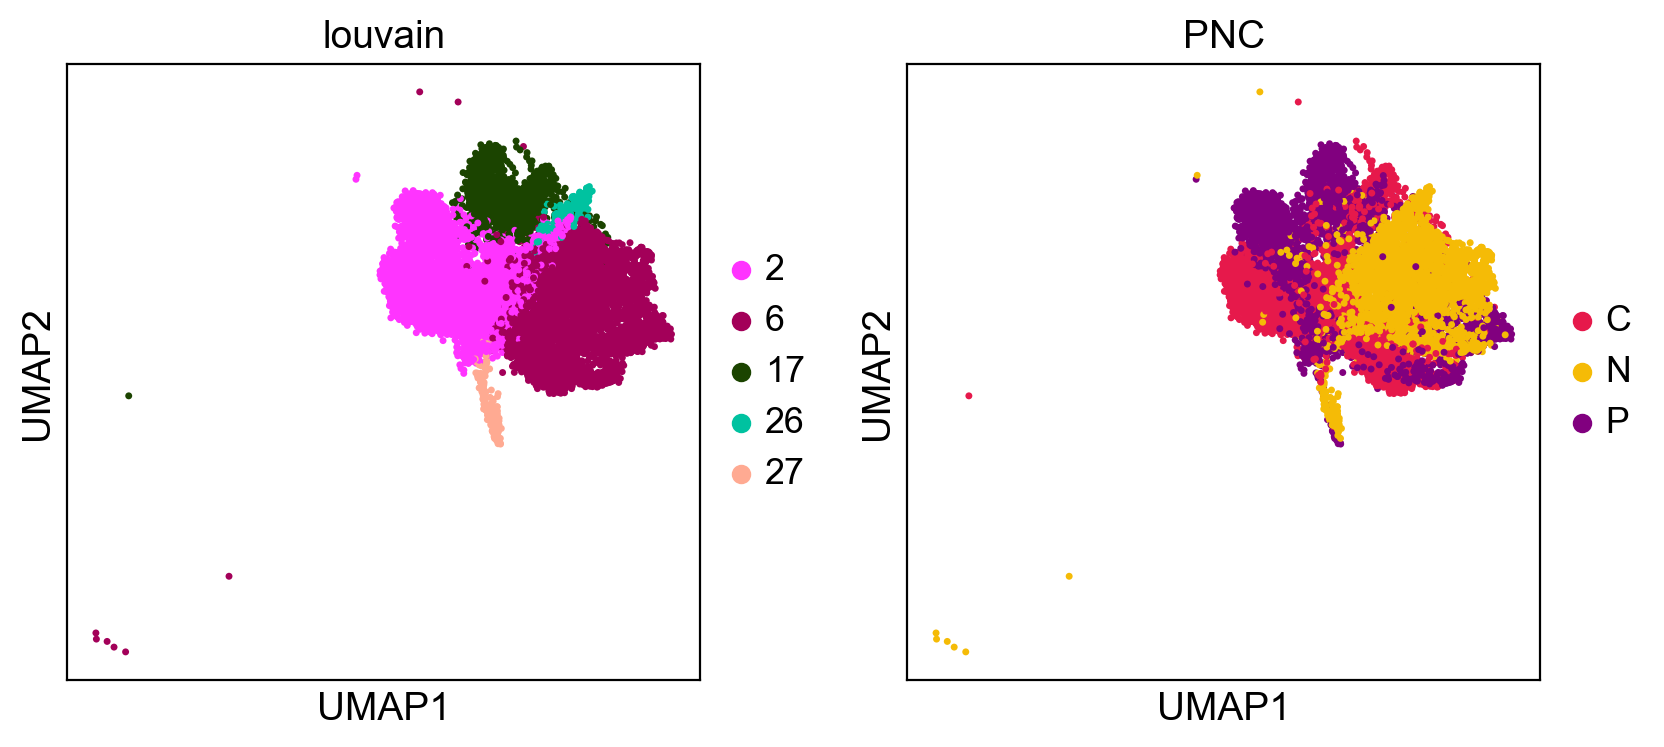

View of AnnData object with n_obs × n_vars = 11207 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

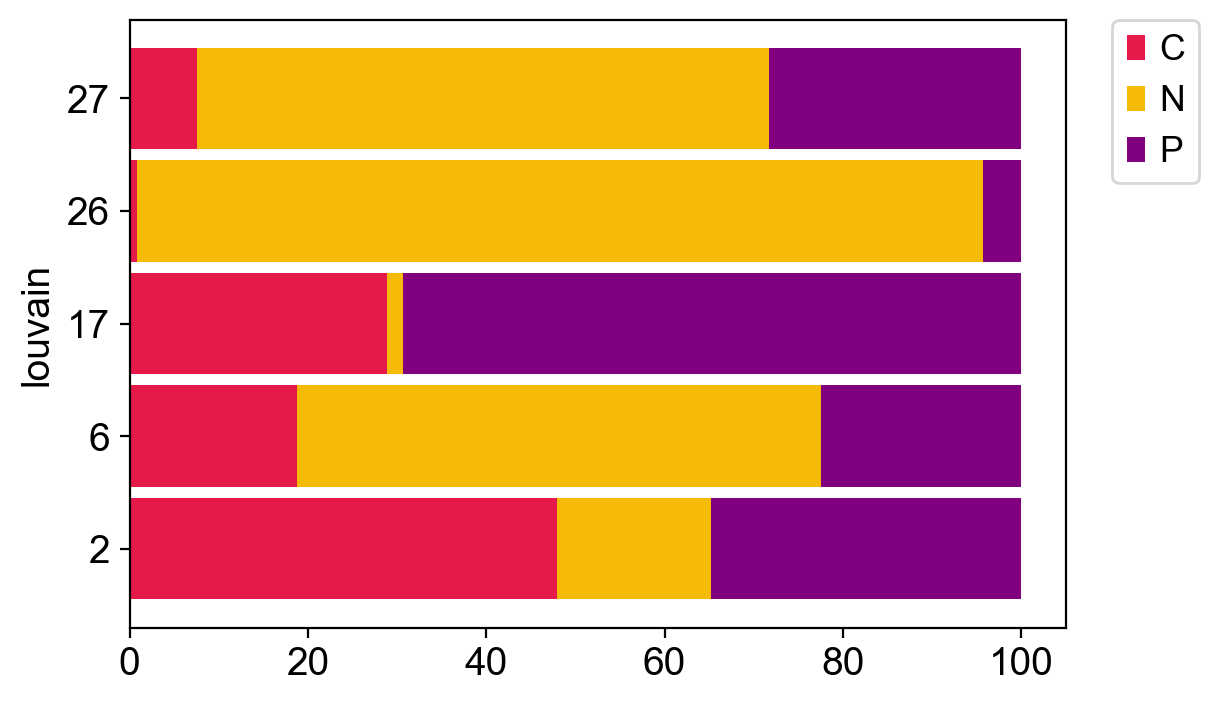

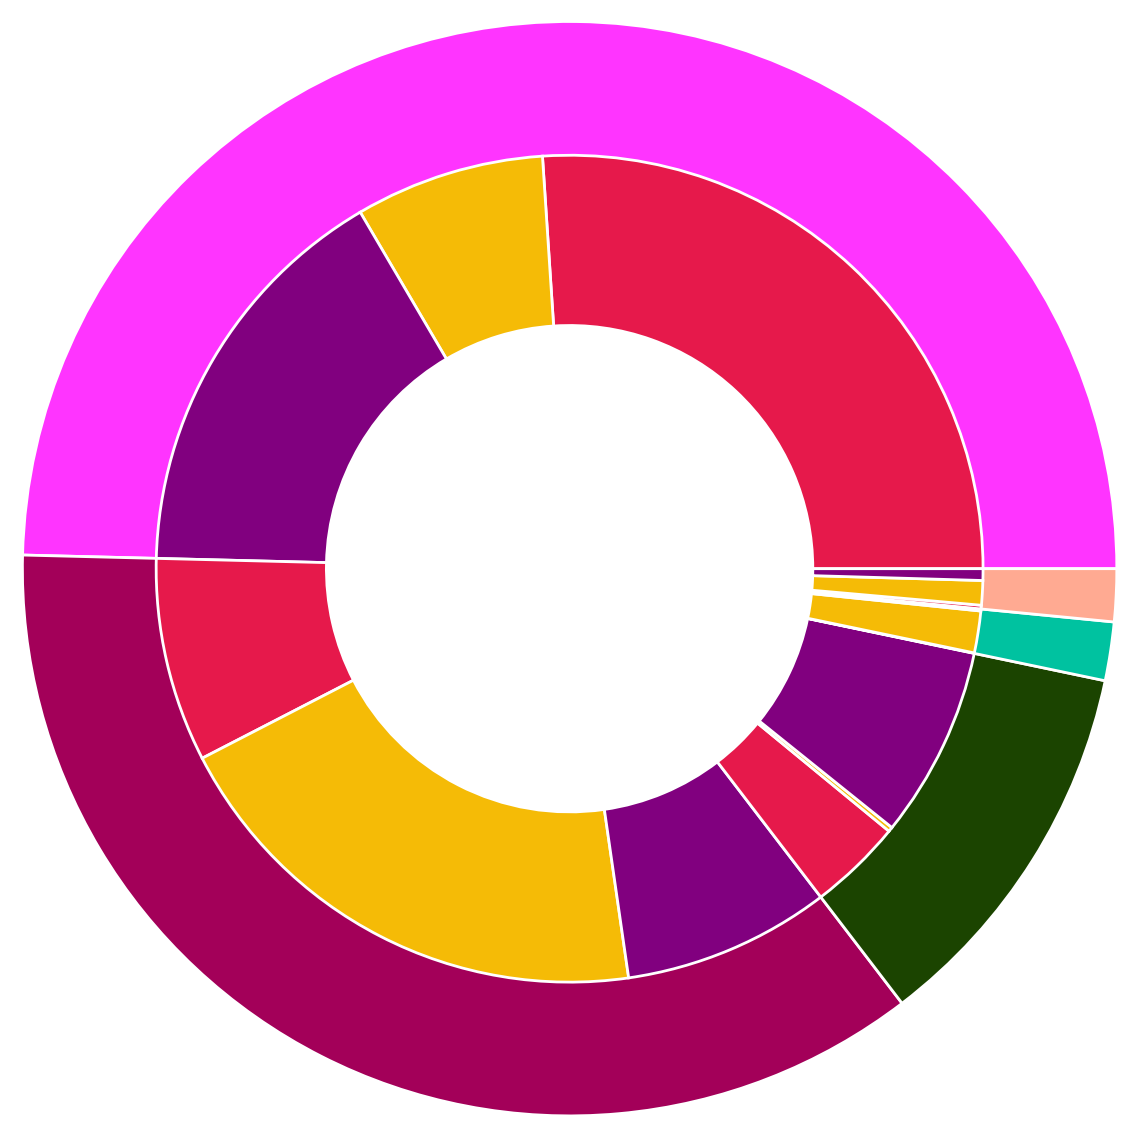

In [25]:
adata_endo = adata[adata.obs.loc[adata.obs.louvain.isin(['2','6','17','26','27'])].index.tolist(), ]

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata_endo, color=['louvain','PNC'], size = 25)#, save='_louvain.png')
display(adata_endo)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = adata_endo.obs.groupby('PNC').size()

df = adata_endo.obs.groupby(['PNC','louvain']).size().unstack().fillna(0)
df = df.div(count, axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=['#e6194b', '#f5bb06', '#81007f'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_NT.pdf')

NT = adata_endo.obs.groupby(['louvain','PNC']).size()
NT

fig, ax = plt.subplots()

size = 0.7
vals = np.array(NT.unstack())

outer_colors = adata_endo.uns['louvain_colors']
inner_colors = ['#e6194b', '#f5bb06', '#81007f']

ax.pie(vals.sum(axis=1), radius=2.5-0.25, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=2.3-0.6, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()
#fig.savefig('piechart__HCC_endo_PNC.pdf', bbox_inches='tight')
#plt.close(fig) 

#  

### Viral Status

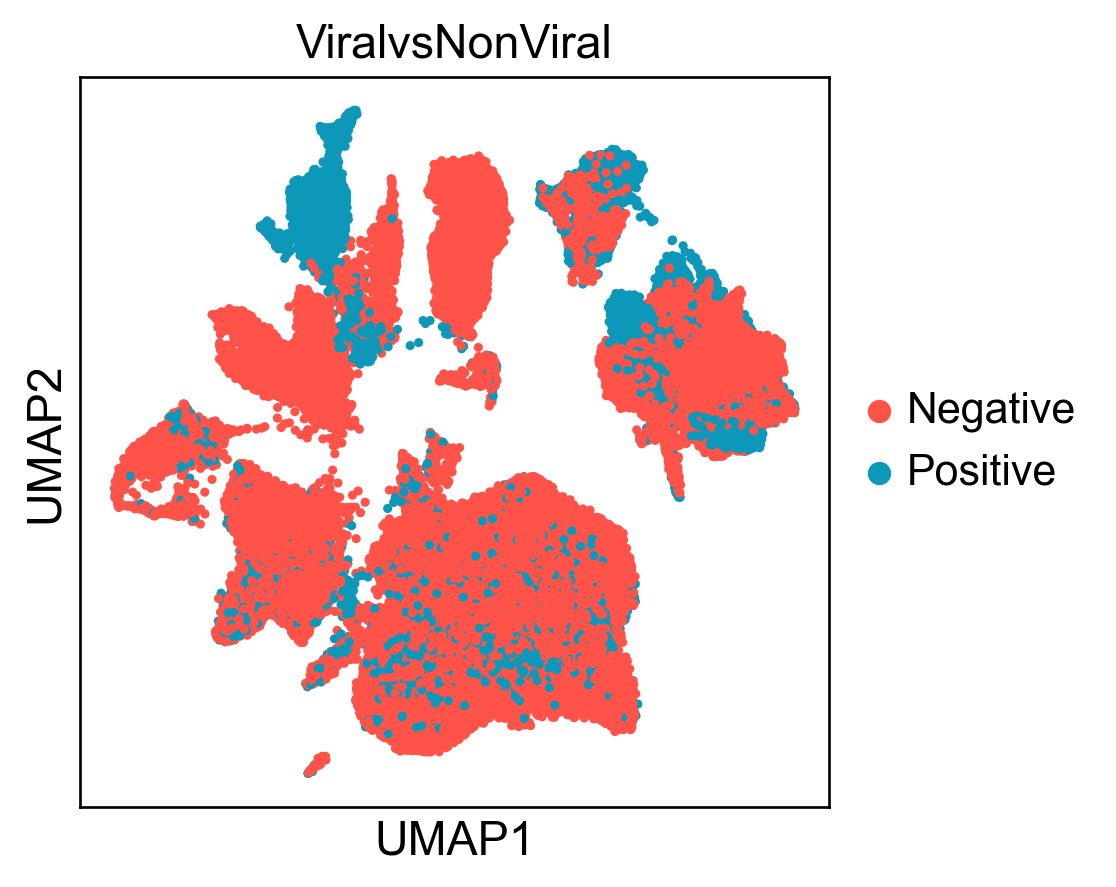

In [17]:
sc.pl.umap(adata, color=['ViralvsNonViral'], size=30)

#  

#  Expression plot

### Stroma

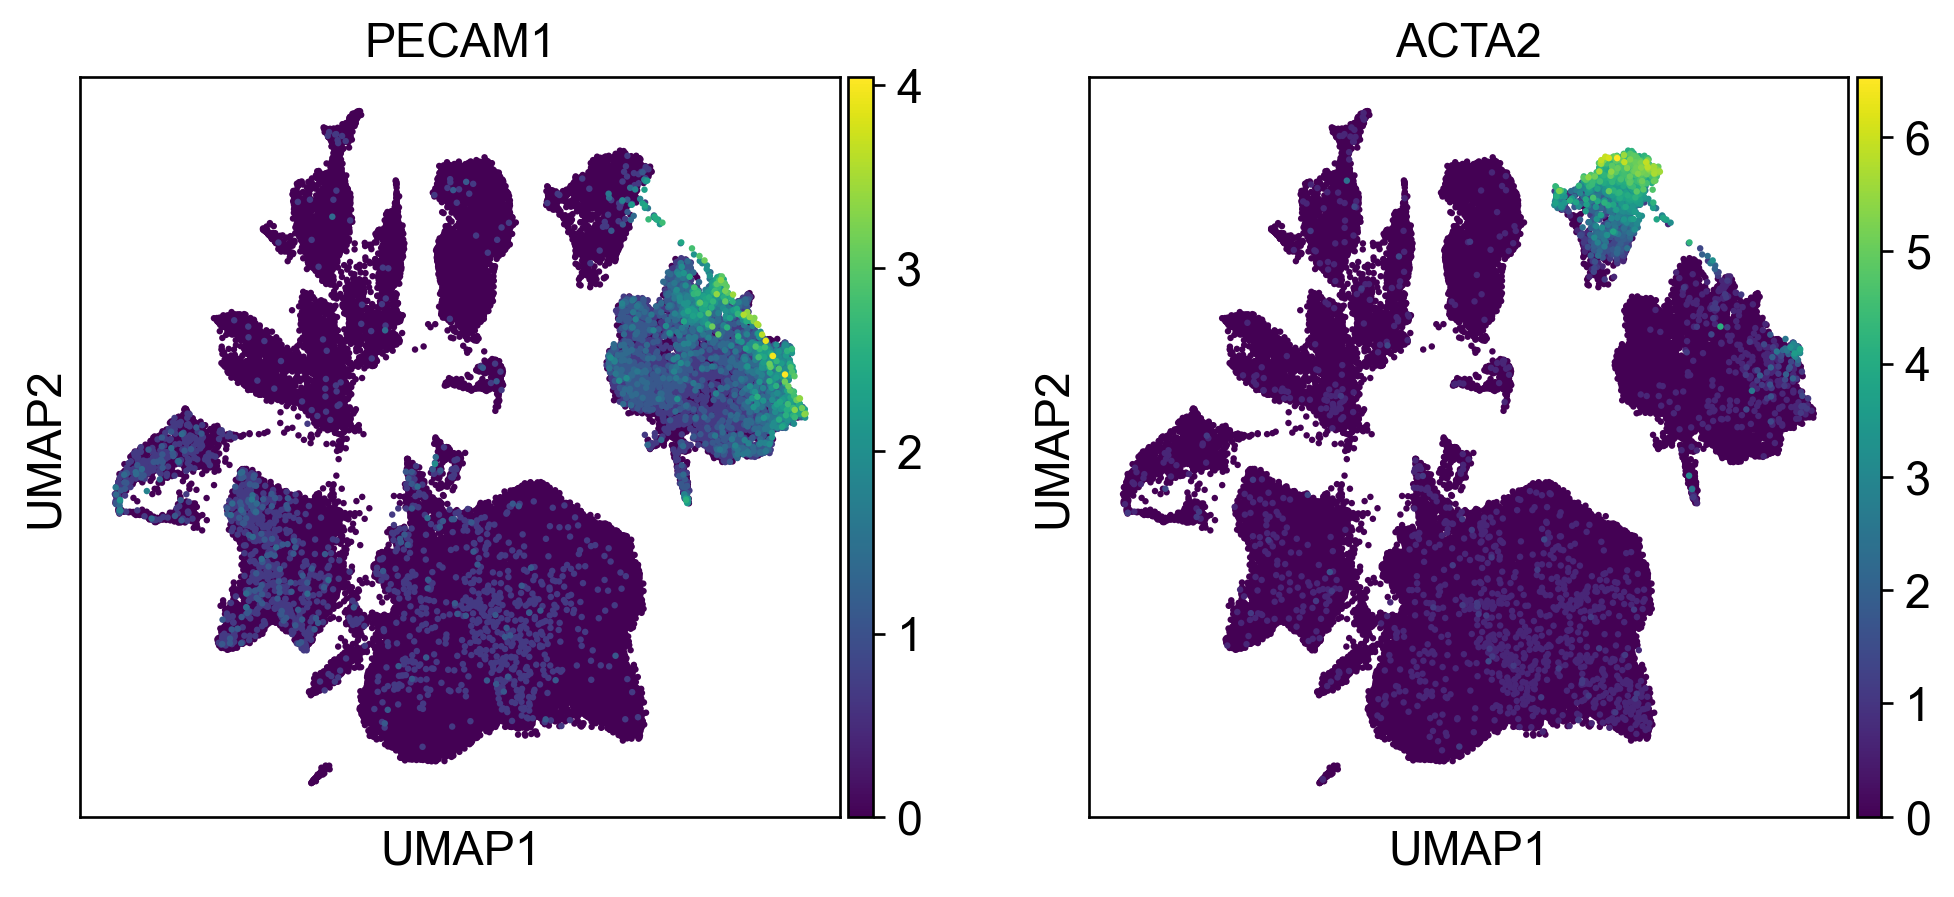

In [15]:
sc.pl.umap(adata, color=['PECAM1','ACTA2'], size=15)

### Epithelial

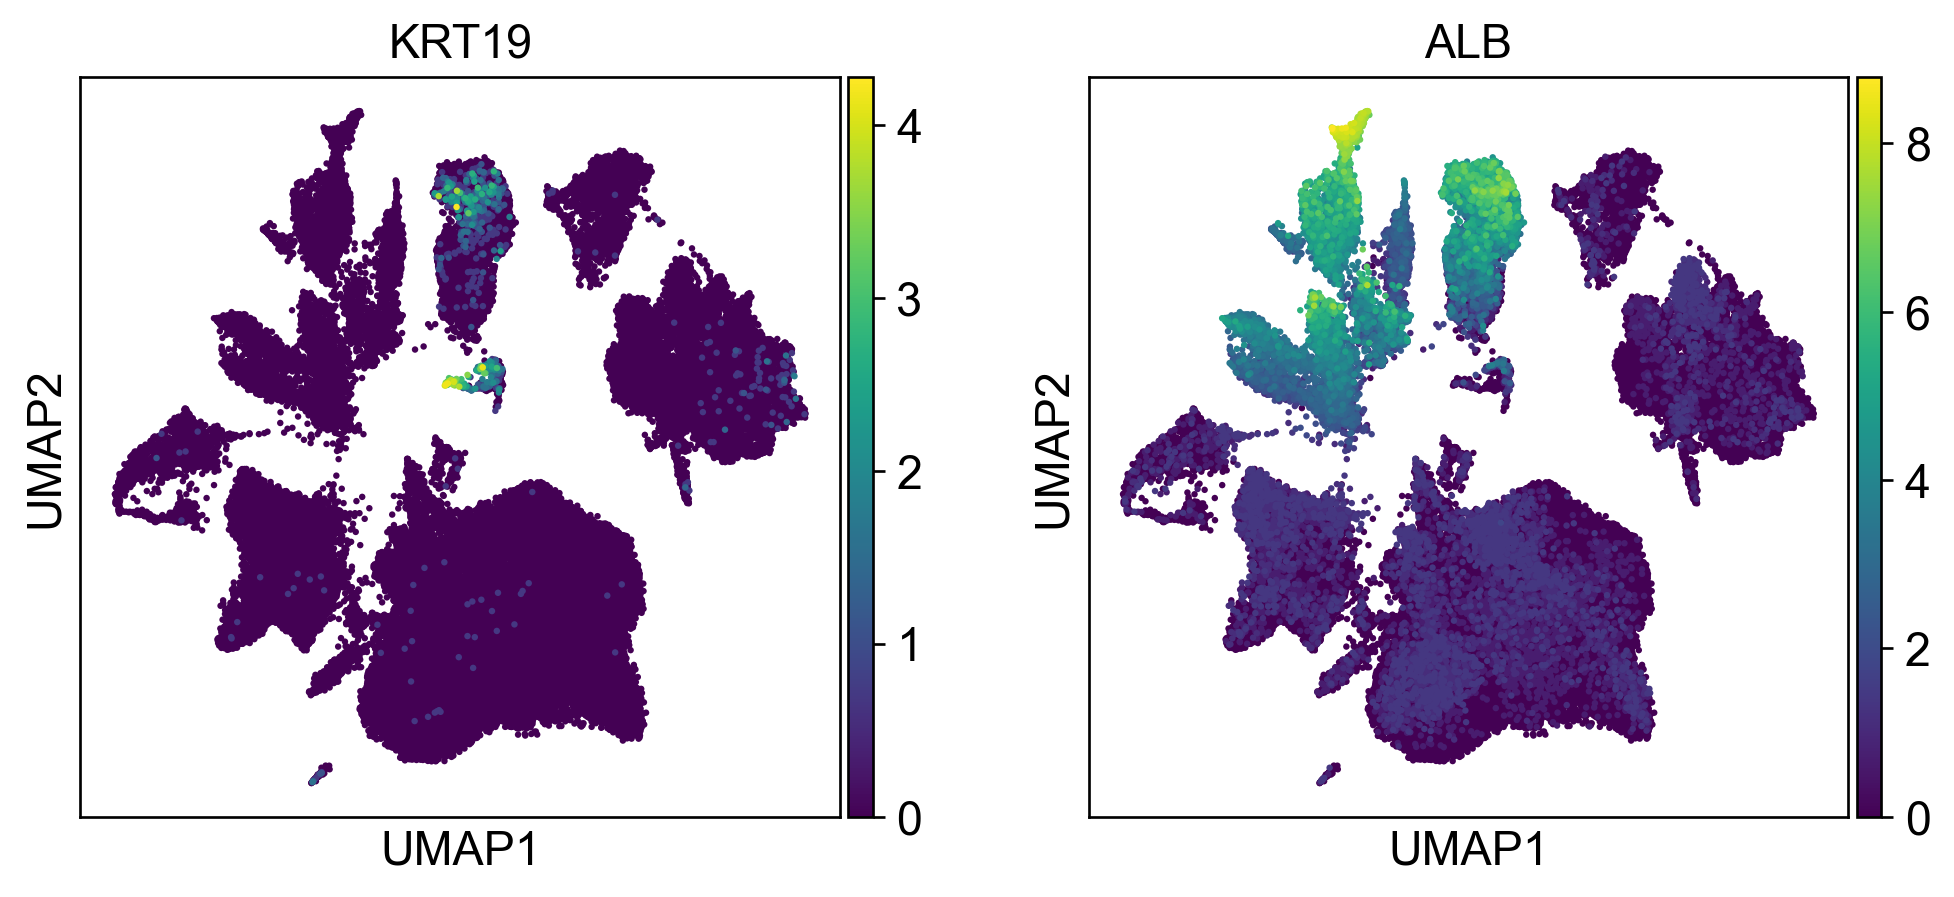

In [16]:
sc.pl.umap(adata, color=['KRT19','ALB'], size=15)

### Immune 

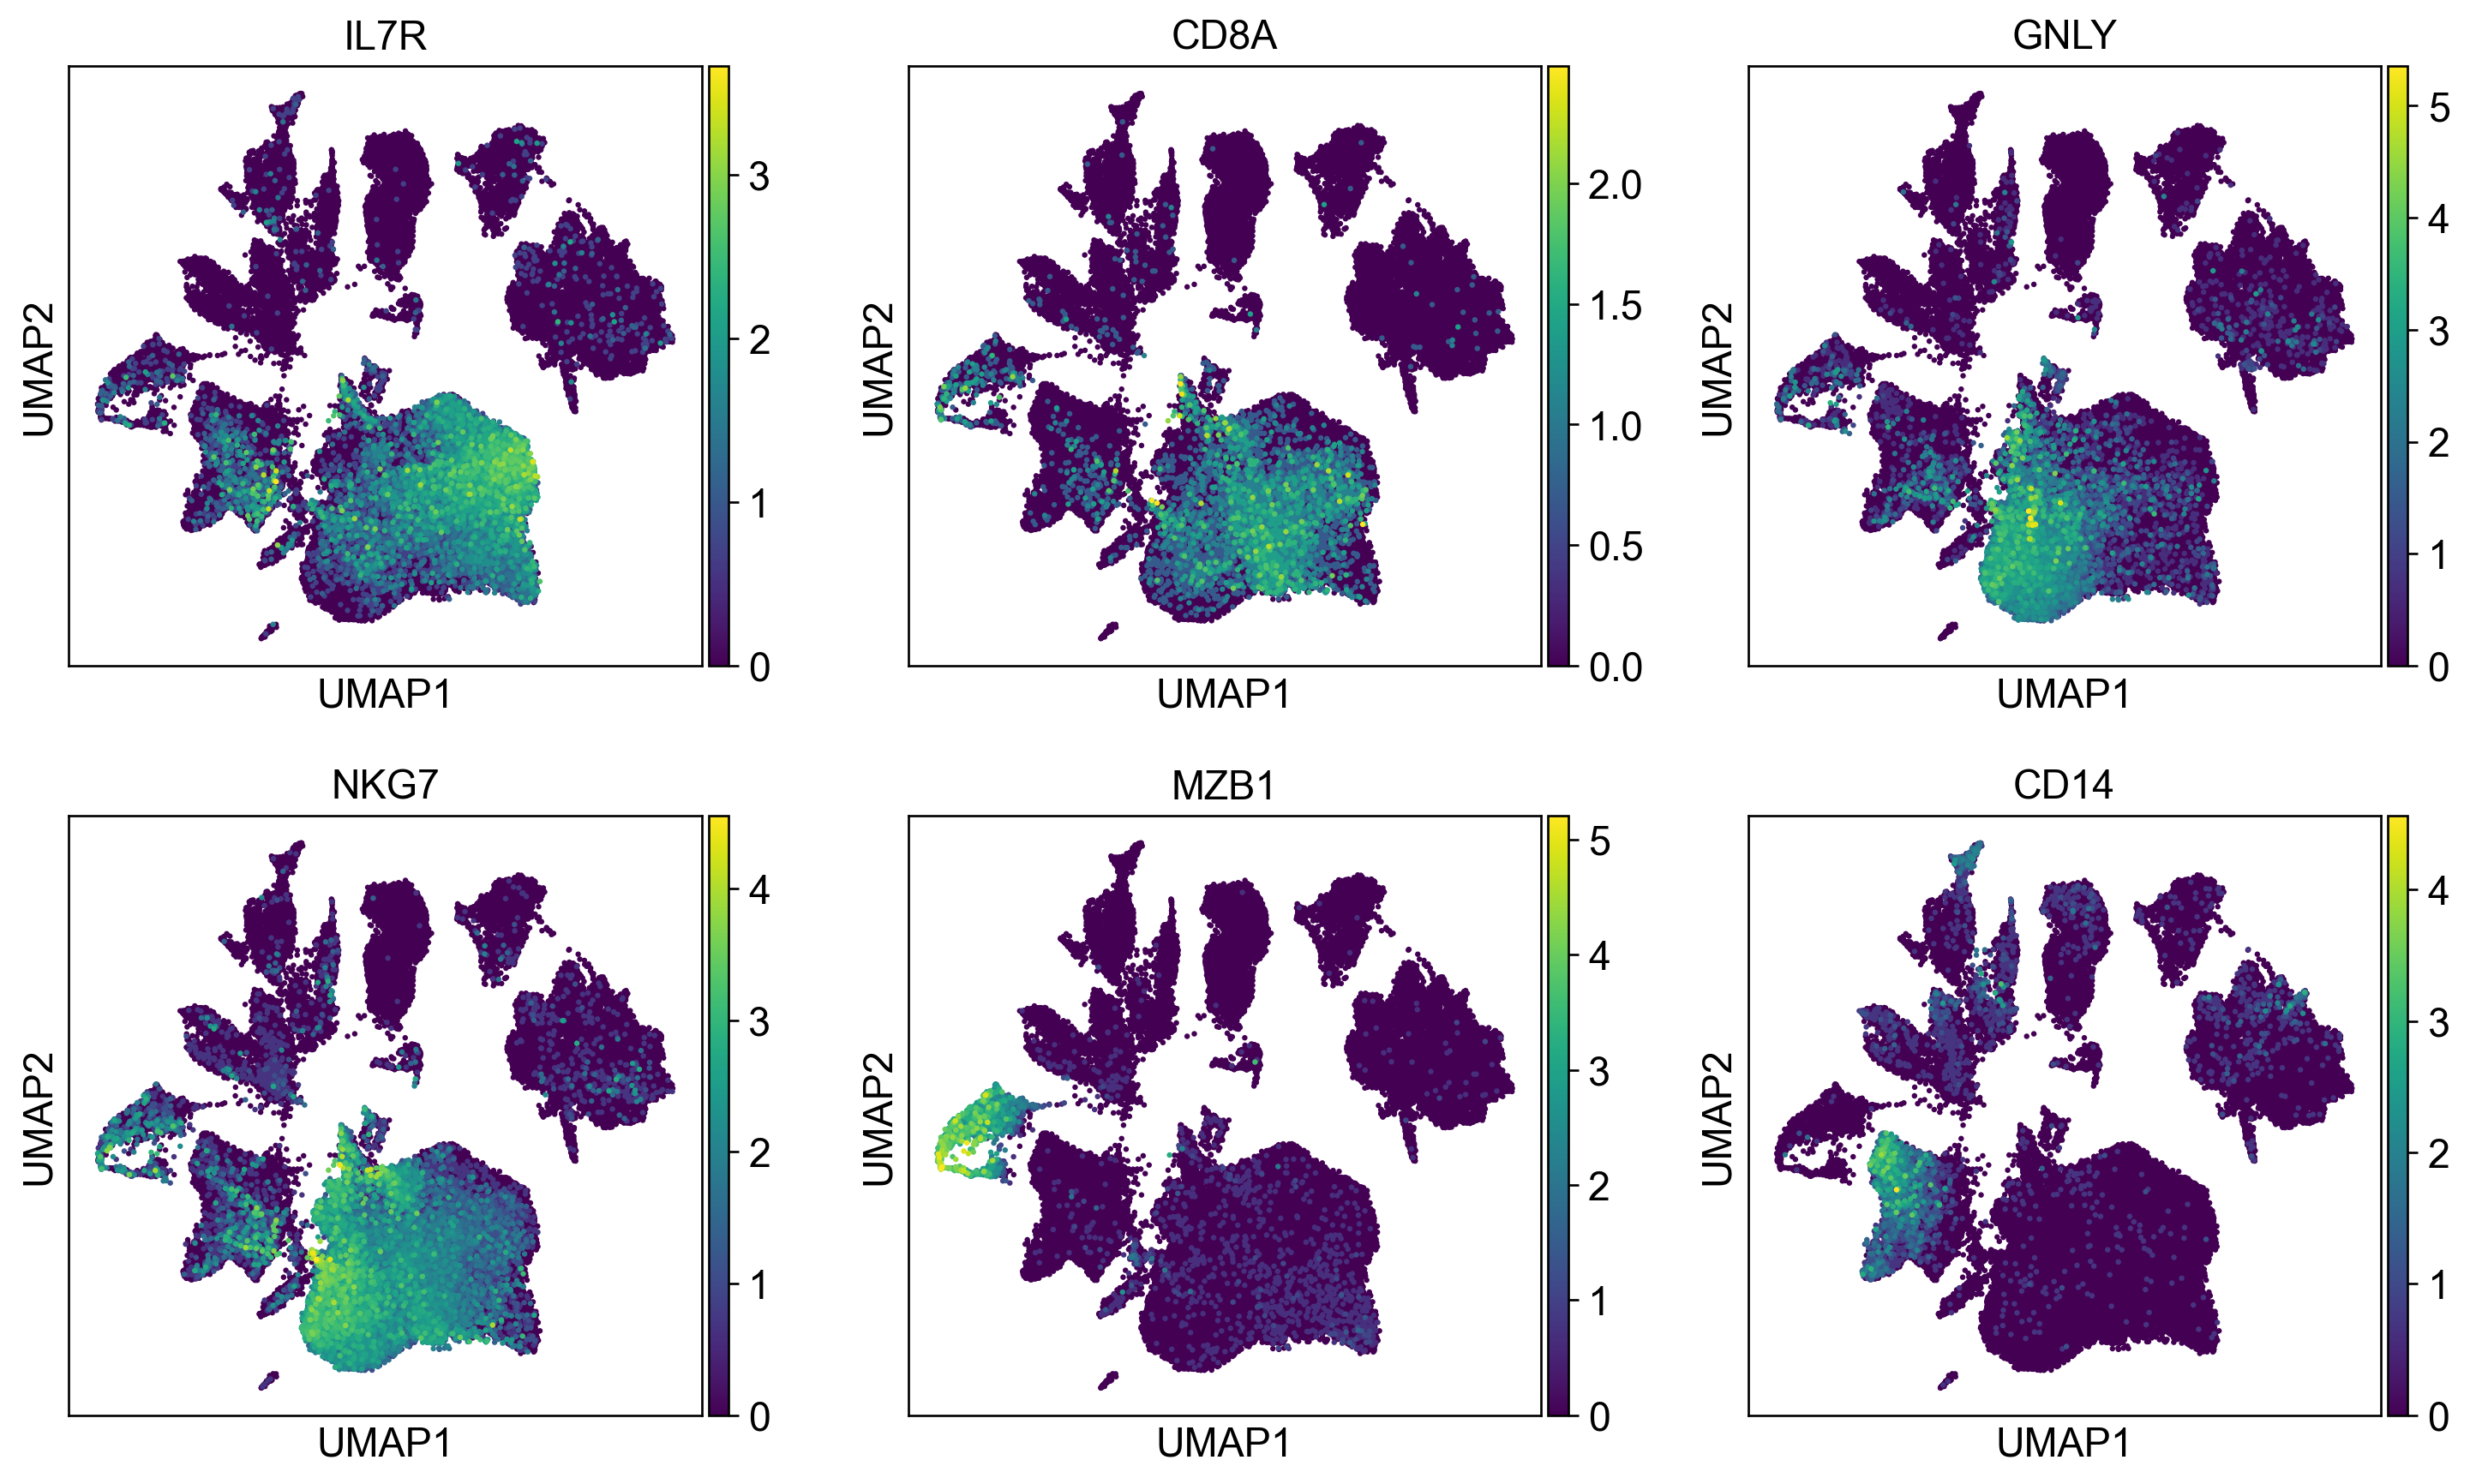

In [18]:
sc.pl.umap(adata, color=['IL7R','CD8A','GNLY','NKG7','MZB1','CD14'], size=15,ncols=3)

#  

### Expression Dotplot 

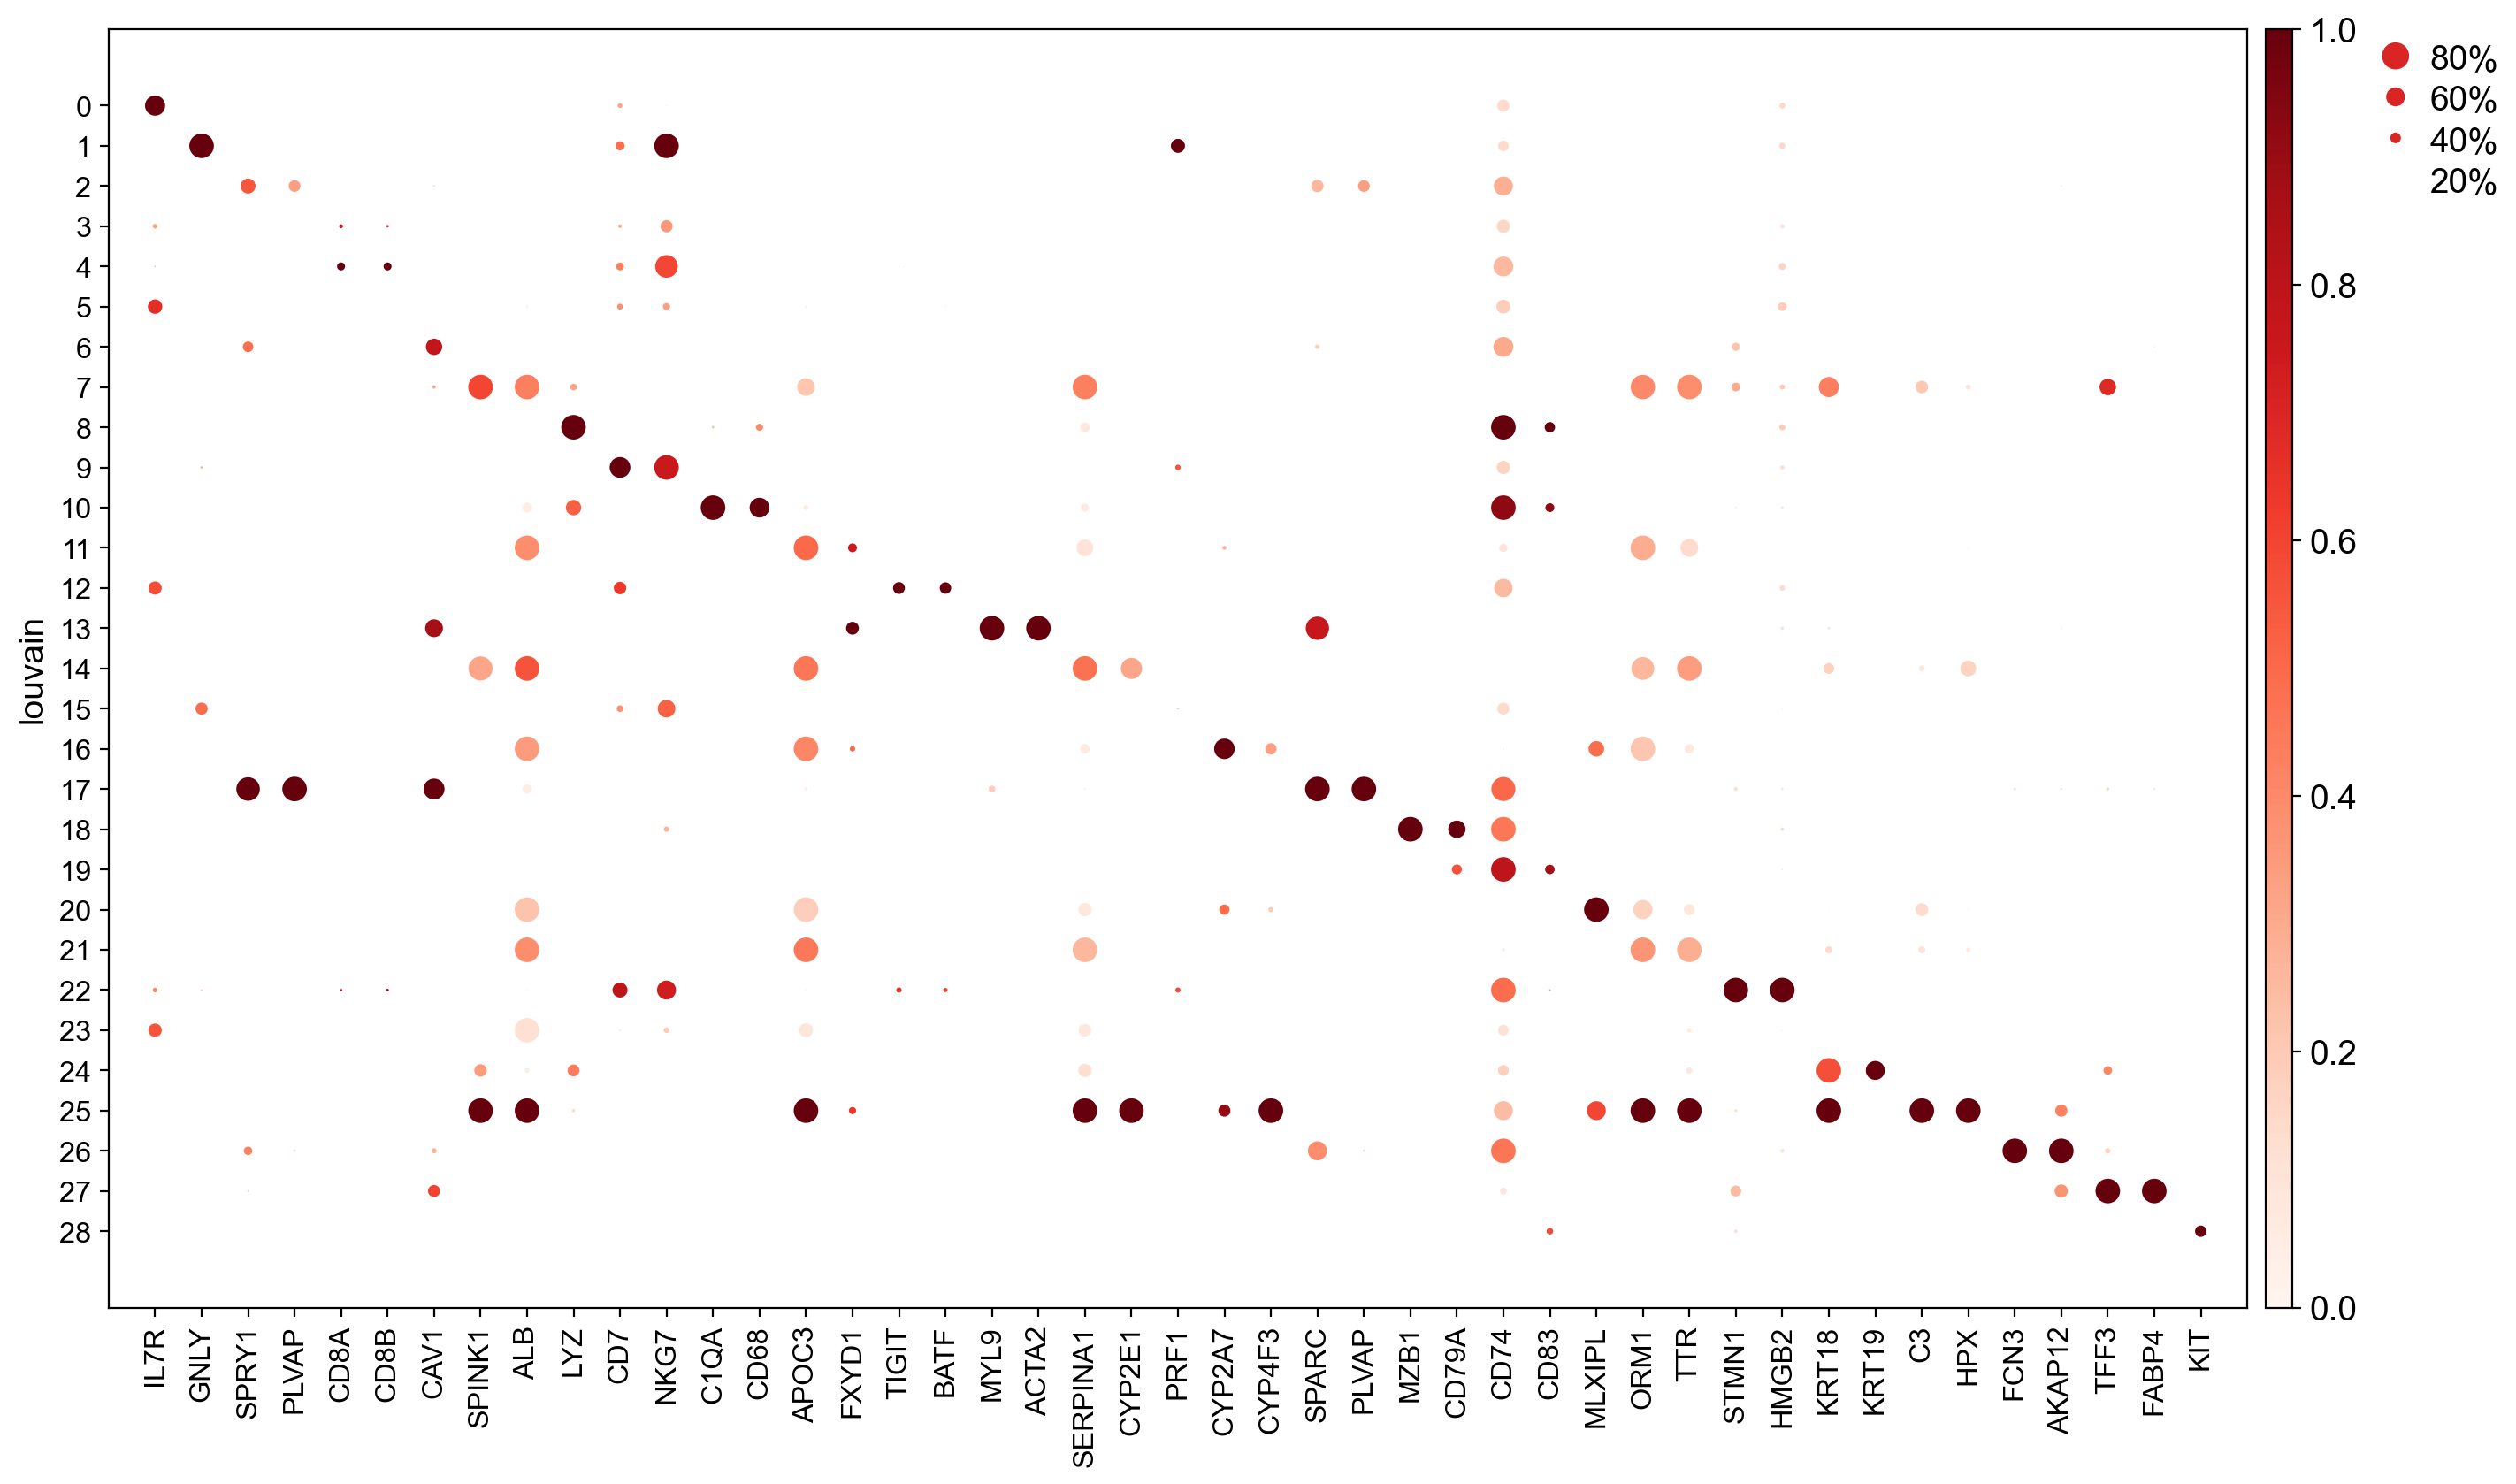

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[15.749999999999998, 0, 0.2, 0.5, 0.25])

In [27]:
genes = ['IL7R', 'GNLY', 'SPRY1', 'PLVAP', 'CD8A', 'CD8B', 'CAV1', 'SPINK1', 'ALB', 'LYZ', 'CD7', 'NKG7', 'C1QA',
         'CD68', 'APOC3', 'FXYD1', 'TIGIT', 'BATF', 'MYL9', 'ACTA2', 'SERPINA1', 'CYP2E1', 'PRF1', 'CYP2A7', 'CYP4F3',
         'SPARC', 'PLVAP', 'MZB1', 'CD79A', 'CD74', 'CD83', 'MLXIPL', 'ORM1', 'TTR', 'STMN1', 'HMGB2', 'KRT18', 'KRT19',
         'C3', 'HPX', 'FCN3', 'AKAP12', 'TFF3', 'FABP4', 'KIT']

sc.pl.dotplot(adata, genes, groupby='louvain', dot_max=0.8, dot_min=0.2, standard_scale='var',
              color_map='Reds')#, save='_HCC_dotplot.pdf')


#  

# HCC Garnett

In [15]:
HCCdf = pd.read_csv('./data/HCCcelltype_marker2.csv',index_col=0)
display(HCCdf.head())
print(HCCdf.shape)
print(set(HCCdf.celltype))
print(len(set(HCCdf.celltype)))

louvain          celltype
AAACCTGGTCGGGTCT-1        4  1 lymph 5 CD8TRM
AAAGCAAGTTCGAATC-1        0     2 lymph 1 NK2
AACCATGAGTAATCCC-1        9     2 lymph 1 NK2
AACCGCGAGCTCCTCT-1        4      1 lymph 1 TC
AACCGCGCACATGTGT-1        0           Unknown

(73589, 2)
{'3 mye 8 BC', '3 mye 7 pDC', '7 Bipotent', '5 endo', '6 Hepa 2', '1 lymph 5 CD8TRM', '2 lymph 1 NKC', '3 mye 5 DC2', '1 lymph 1 TC', '3 mye 1', '5 endo CD9', '3 mye 4 DC1', '1 lymph 4 CD8', '6 Hepa 1', '2 lymph 1 NK1', '1 lymph 3 Treg', '8 Mast', '6 Hepa', '5 endo FCN3', '4 fibro', '5 endo TFF3', '5 endo PLVAP', '1 lymph 2 CD4', '6 Hepa 3', '3 mye 3 TAM', '3 mye 2 macro S100A8', 'Unknown', '2 lymph 1 NK2', '3 mye 6 DC3'}
29


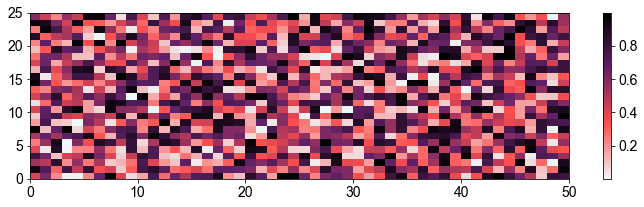

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

cmap = matplotlib.cm.ocean.reversed()

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(239, 248, 249), (252, 78, 78),(96, 33, 104),(0,0,0)]  # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

def sns_heatmap(df,title,subtitle):
    mat = pd.DataFrame()

    for i in range(df.shape[1]):
        if i==df.shape[1]-1:
            break
        for j in range(df.shape[0]):
            a = []
            for k in range(df.shape[0]):
                if j == k:
                    a.append(df.iloc[j,i]*df.iloc[k,i+1])
                else :
                    a.append(0)
            mat[j]=a

    mat.columns = df.index
    mat.index = df.index

    mat = mat.rename_axis(df.columns[1])
    mat = mat.rename_axis(df.columns[0], axis="columns")

    f, ax = plt.subplots()
    sns.heatmap(mat,vmax=1500, vmin=-1, cmap=my_cmap)#
    plt.title(title, fontsize=20)
    plt.suptitle(subtitle, fontsize=12)

    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)

Previous size: [12.0, 10.0]
Current size: [12, 10]


Text(0.5, 1.0, '\nHCC cell type agnostic correlation\n')

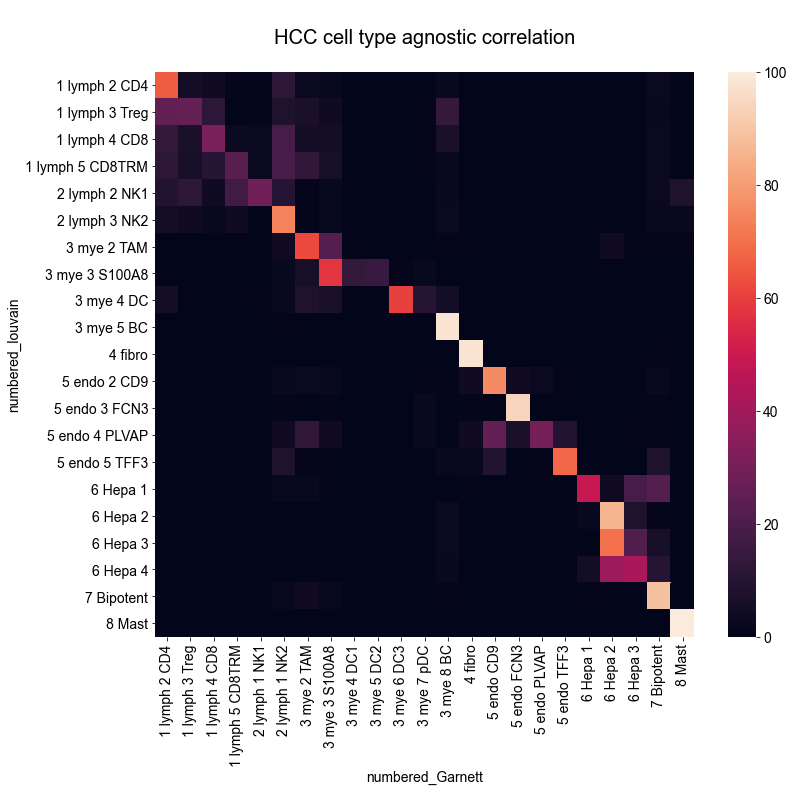

In [17]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

HCCdf2 = HCCdf1.drop(['1 lymph 1 TC','2 lymph 1 NKC','3 mye 1','5 endo','6 Hepa', 'Unknown'], axis=1)#
#HCCdf2 = HCCdf2.drop(['1 lymph STMN1'], axis=0)

HCCdf2 = HCCdf2.apply(lambda x : x/sum(x)*100,1).round(0).astype(int)

sns_plot = sns.heatmap(HCCdf2)#, cmap="YlGnBu", linewidths=.009)#, vmax = 500,, annot=True, fmt="d", linewidths=.01
plt.title('\nHCC cell type agnostic correlation\n', fontsize=20)

#fig = sns_plot.get_figure()
#fig.savefig('./finalfig/HCC.png') 